In [1]:
import pandas as pd

# Create a DataFrame with your data
data = {
    "title": [
        "A Lélek órása",
        "Aizaugusa gravi viegli krist",
        "Agliyorum",
        "0_1_0",
        "97 fung lau mung"
    ],
    "year": [
        1923,
        1986,
        1988,
        2008,
        1994
    ]
}

titles = pd.DataFrame(data)

# Print the 'titles' DataFrame
print(titles)

                          title  year
0                 A Lélek órása  1923
1  Aizaugusa gravi viegli krist  1986
2                     Agliyorum  1988
3                         0_1_0  2008
4              97 fung lau mung  1994


In [2]:
%matplotlib inline
import pandas as pd

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Read the 'titles.csv' file
titles = pd.read_csv('data/titles.csv')
titles.head()


,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

AttributeError: type object 'DataFrame' has no attribute 'from_csv'

In [5]:
import pandas as pd

# Create your data as a list of dictionaries
data = [
    {'title': 'The Core', 'year': 2003, 'name': 'Alejandro Abellan', 'type': 'actor', 'Character': 'U.S.S. Soldier', 'n': 'NaN'},
    {'title': 'Il momento di uccidere', 'year': 1968, 'name': 'Remo De Angelis', 'type': 'actor','Character': 'Dago', 'n': 9},
    {'title': 'Across the Divide', 'year': 1921, 'name': 'Thomas Delmar', 'type': 'actor', 'Character': 'Dago', 'n': 4},
    {'title': 'Revan', 'year': 2012, 'name': 'Diego James', 'type':'actor', 'Character': 'Dago','n': 'NaN'},
    {'title': 'Un homme marche dans la ville', 'year': 1950, 'name': 'Fabien Loris', 'type':'actor', 'Character': 'Dago','n': 12}
]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,title,year,name,type,Character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [6]:
import pandas as pd


data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "character": [
        "Superman",
        "Superman",
        "Batman",
        "Superman",
        "Batman",
        "Superman",
        "Superman",
        "Batman",
        "Superman",
        "Superman"
    ],
    "affiliation": [
        "DC",
        "DC",
        "DC",
        "DC",
        "DC",
        "DC",
        "DC",
        "DC",
        "DC",
        "DC"
    ]
}

df = pd.DataFrame(data)

# Filter for characters affiliated with DC (Superman and Batman)
dc_characters = df[df['affiliation'] == 'DC']

# Group characters by year and count the number of Superman and Batman characters for each year
character_counts_by_year = dc_characters.groupby(['year', 'character'])['character'].count().unstack(fill_value=0)

# Check if each year is a "Superman year" (more Superman characters than Batman)
superman_years = character_counts_by_year[character_counts_by_year['Superman'] > character_counts_by_year['Batman']]

# Count the number of "Superman years"
num_superman_years = len(superman_years)

print("Number of 'Superman years' in film history:", num_superman_years)


Number of 'Superman years' in film history: 3


In [7]:
# Filter for characters affiliated with DC (Superman and Batman)
dc_characters = df[df['affiliation'] == 'DC']

# Group characters by year and count the number of Superman and Batman characters for each year
character_counts_by_year = dc_characters.groupby(['year', 'character'])['character'].count().unstack(fill_value=0)

# Check if each year is a "Batman year" (more Batman characters than Superman)
batman_years = character_counts_by_year[character_counts_by_year['Batman'] > character_counts_by_year['Superman']]

# Count the number of "Batman years"
num_batman_years = len(batman_years)

print("Number of 'Batman years' in film history:", num_batman_years)

Number of 'Batman years' in film history: 0


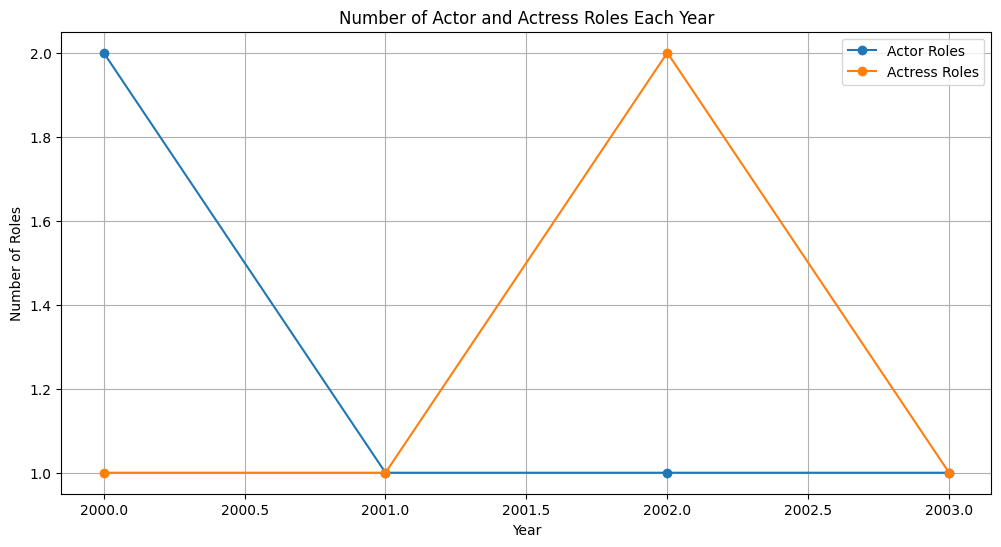

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "name": [
        "Actor 1",
        "Actress 1",
        "Actor 2",
        "Actress 2",
        "Actor 3",
        "Actress 3",
        "Actor 4",
        "Actress 4",
        "Actor 5",
        "Actress 5"
    ],
    "type": [
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress"
    ]
}

df = pd.DataFrame(data)

# Filter for actor and actress roles separately
actor_roles = df[df['type'] == 'actor']
actress_roles = df[df['type'] == 'actress']

# Group actor roles by year and count the number of roles for each year
actor_counts_by_year = actor_roles.groupby('year')['name'].count()

# Group actress roles by year and count the number of roles for each year
actress_counts_by_year = actress_roles.groupby('year')['name'].count()

# Plot the number of actor and actress roles each year
plt.figure(figsize=(12, 6))
plt.plot(actor_counts_by_year.index, actor_counts_by_year.values, label='Actor Roles', marker='o')
plt.plot(actress_counts_by_year.index, actress_counts_by_year.values, label='Actress Roles', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)
plt.show()


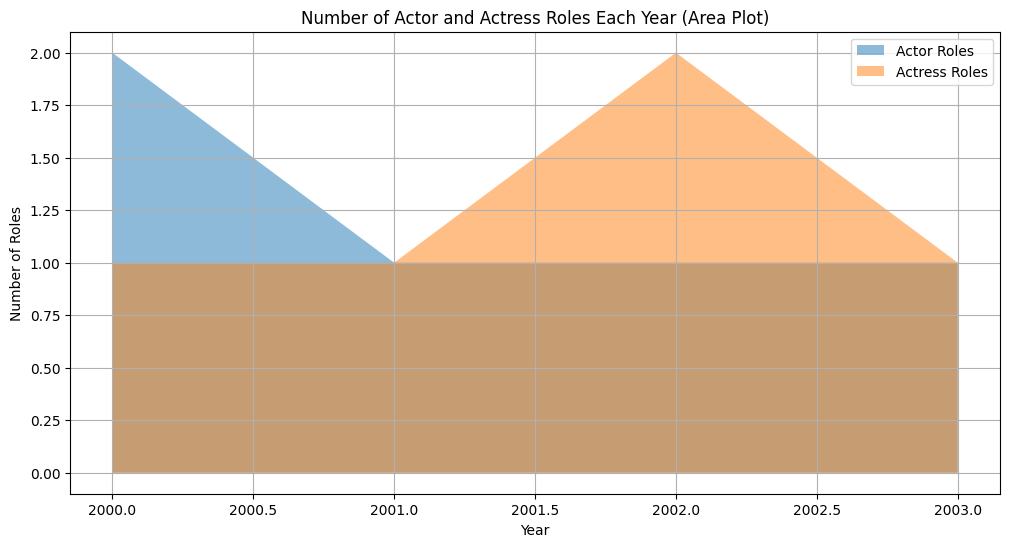

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with movie data (replace with your actual data)
data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "name": [
        "Actor 1",
        "Actress 1",
        "Actor 2",
        "Actress 2",
        "Actor 3",
        "Actress 3",
        "Actor 4",
        "Actress 4",
        "Actor 5",
        "Actress 5"
    ],
    "type": [
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress"
    ]
}

df = pd.DataFrame(data)

# Filter for actor and actress roles separately
actor_roles = df[df['type'] == 'actor']
actress_roles = df[df['type'] == 'actress']

# Group actor roles by year and count the number of roles for each year
actor_counts_by_year = actor_roles.groupby('year')['name'].count()

# Group actress roles by year and count the number of roles for each year
actress_counts_by_year = actress_roles.groupby('year')['name'].count()

# Plot the number of actor and actress roles each year as an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(actor_counts_by_year.index, actor_counts_by_year.values, label='Actor Roles', alpha=0.5)
plt.fill_between(actress_counts_by_year.index, actress_counts_by_year.values, label='Actress Roles', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.legend()
plt.grid(True)
plt.show()


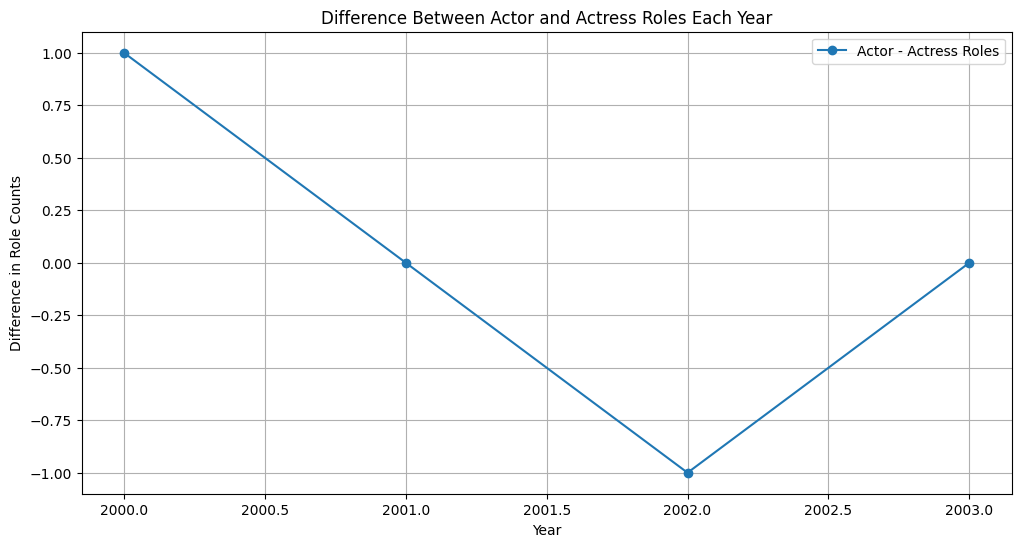

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "name": [
        "Actor 1",
        "Actress 1",
        "Actor 2",
        "Actress 2",
        "Actor 3",
        "Actress 3",
        "Actor 4",
        "Actress 4",
        "Actor 5",
        "Actress 5"
    ],
    "type": [
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress"
    ]
}

df = pd.DataFrame(data)

# Filter for actor and actress roles separately
actor_roles = df[df['type'] == 'actor']
actress_roles = df[df['type'] == 'actress']

# Group actor roles by year and count the number of roles for each year
actor_counts_by_year = actor_roles.groupby('year')['name'].count()

# Group actress roles by year and count the number of roles for each year
actress_counts_by_year = actress_roles.groupby('year')['name'].count()

# Calculate the difference between actor and actress roles each year
role_difference = actor_counts_by_year - actress_counts_by_year

# Plot the difference between actor and actress roles each year
plt.figure(figsize=(12, 6))
plt.plot(role_difference.index, role_difference.values, label='Actor - Actress Roles', marker='o')
plt.xlabel('Year')
plt.ylabel('Difference in Role Counts')
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)
plt.show()


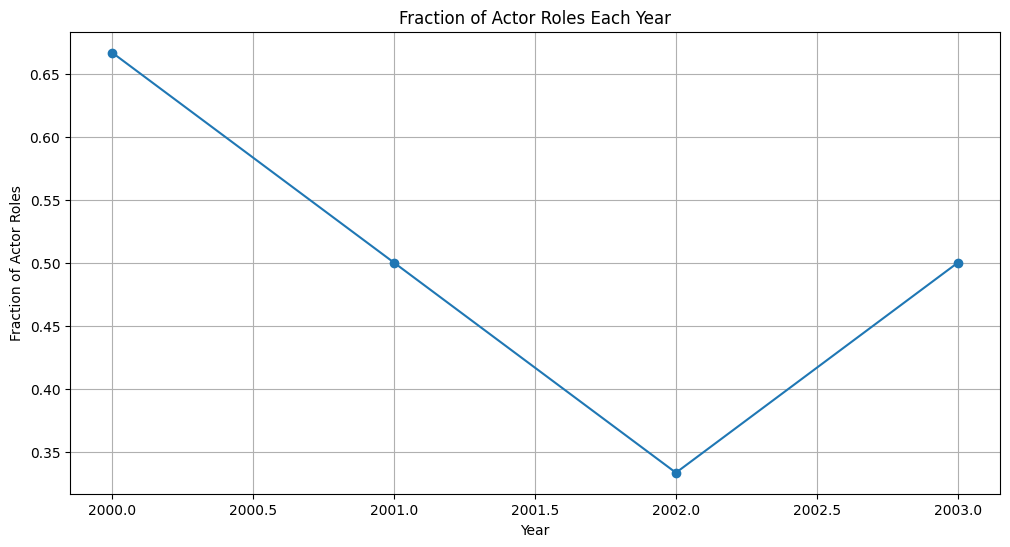

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "type": [
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress"
    ]
}

df = pd.DataFrame(data)

# Group roles by year and count the number of 'actor' roles for each year
roles_by_year = df.groupby('year')['type'].value_counts().unstack(fill_value=0)

# Calculate the fraction of 'actor' roles each year
total_roles_each_year = roles_by_year.sum(axis=1)
actor_roles_each_year = roles_by_year['actor']
fraction_actor_roles = actor_roles_each_year / total_roles_each_year

# Plot the fraction of 'actor' roles each year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, label='Fraction of Actor Roles', marker='o')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year')
plt.grid(True)
plt.show()


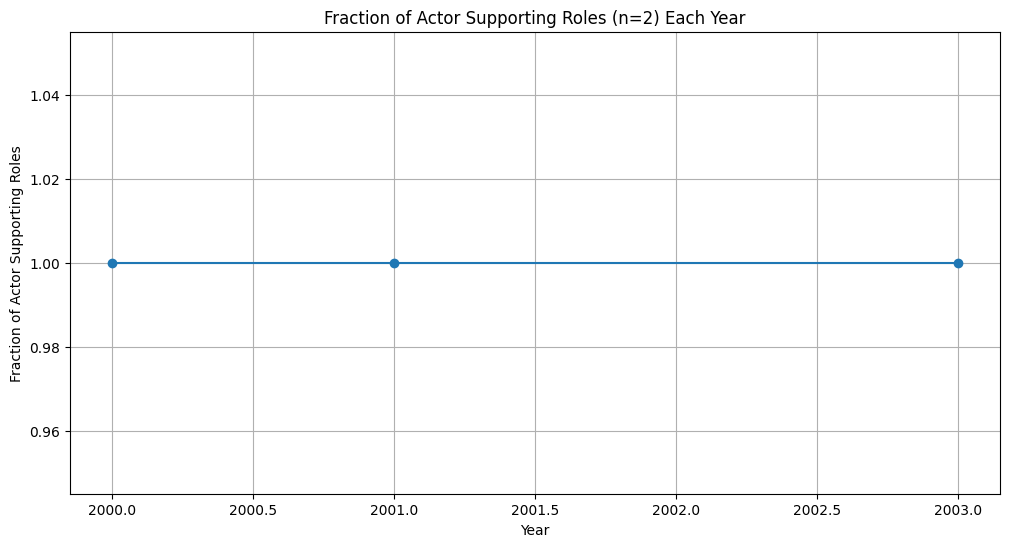

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with movie data 
data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "type": [
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress"
    ],
    "n": [
        1,
        1,
        2,
        1,
        2,
        2,
        1,
        1,
        2,
        2
    ]
}

df = pd.DataFrame(data)

# Filter for supporting roles (n=2) and actor roles separately
supporting_actor_roles = df[(df['n'] == 2) & (df['type'] == 'actor')]

# Group supporting actor roles by year and count the number of roles for each year
roles_by_year = supporting_actor_roles.groupby('year')['type'].value_counts().unstack(fill_value=0)

# Calculate the fraction of supporting actor roles each year
total_supporting_roles_each_year = roles_by_year.sum(axis=1)
actor_supporting_roles_each_year = roles_by_year['actor']
fraction_actor_supporting_roles = actor_supporting_roles_each_year / total_supporting_roles_each_year

# Plot the fraction of supporting actor roles each year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_supporting_roles.index, fraction_actor_supporting_roles.values, label='Fraction of Actor Supporting Roles', marker='o')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Supporting Roles')
plt.title('Fraction of Actor Supporting Roles (n=2) Each Year')
plt.grid(True)
plt.show()


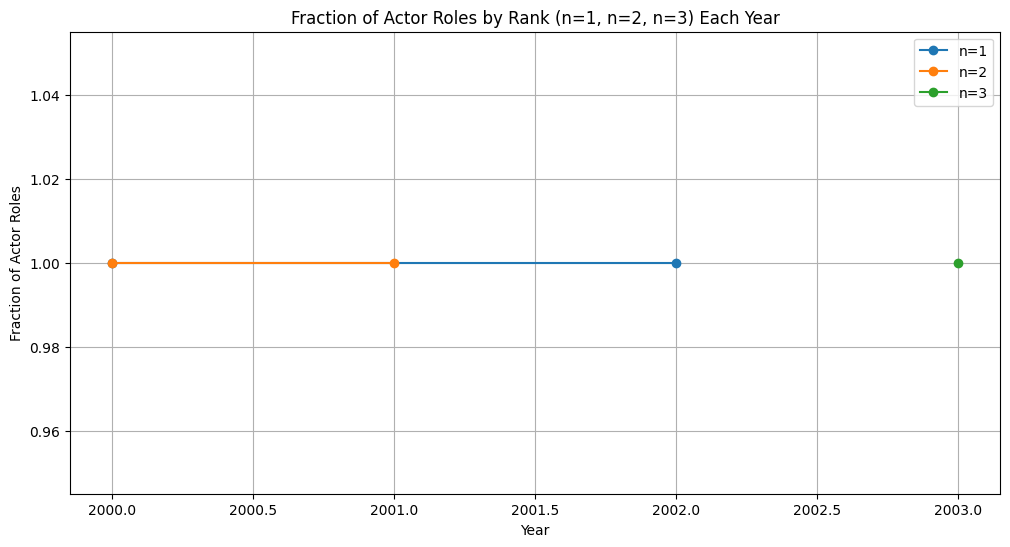

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "year": [
        2000,
        2000,
        2000,
        2001,
        2001,
        2002,
        2002,
        2002,
        2003,
        2003
    ],
    "type": [
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress",
        "actor",
        "actress"
    ],
    "n": [
        1,
        1,
        2,
        1,
        2,
        2,
        1,
        1,
        3,
        3
    ],
    "name": [
        "Actor 1",
        "Actress 1",
        "Actor 2",
        "Actress 2",
        "Actor 3",
        "Actress 3",
        "Actor 4",
        "Actress 4",
        "Actor 5",
        "Actress 5"
    ]
}

df = pd.DataFrame(data)

# Filter for actor roles and roles with n values 1, 2, and 3 separately
actor_roles = df[df['type'] == 'actor']
roles_by_n = {}
for n in range(1, 4):
    roles_by_n[n] = df[(df['n'] == n) & (df['type'] == 'actor')]

# Create a plot for each rank (n=1, n=2, n=3)
plt.figure(figsize=(12, 6))
for n in range(1, 4):
    # Group actor roles by year and count the number of roles for each year
    roles_by_year = roles_by_n[n].groupby('year')['type'].value_counts().unstack(fill_value=0)
    
    # Calculate the fraction of 'actor' roles each year for the current rank
    total_roles_each_year = roles_by_year.sum(axis=1)
    actor_roles_each_year = roles_by_year['actor']
    fraction_actor_roles = actor_roles_each_year / total_roles_each_year
    
    # Plot the fraction of 'actor' roles each year for the current rank
    plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, label=f'n={n}', marker='o')

plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles by Rank (n=1, n=2, n=3) Each Year')
plt.legend()
plt.grid(True)
plt.show()
